In [1]:
import numpy as np
import csv
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

# Part 1


|Size |Orbit|habitable | Count|
|-----|-----|----------|------|
|big|near|yes|20|
|big|far|yes|170|
|small|near|yes|139|
|small|far|yes|45|
|big|near|no|130|
|big|far|no|30|
|small|near|no|11|
|small|far|no|255|

In [20]:
tree_data = np.array([[1,0,1,20],
                      [1,1,1,170],
                      [0,0,1,139],
                      [0,1,1,45],
                      [1,0,0,130],
                      [1,1,0,30],
                      [0,0,0,11],
                      [0,1,0,255]
                     ])
def calculate_entropy(col_num,data):
    pos_instances = 0
    neg_instances = 0
    for row in data:
        #is habitible
        if(row[-2]==1):
            pos_instances+=row[-1]
        else:
            neg_instances+=row[-1]
    total = pos_instances+neg_instances
    p_p = float(pos_instances)/float(total)
    p_n = float(neg_instances)/float(total)
    return -1.0*p_p*math.log(p_p,2)-1.0*p_n*math.log(p_n,2)
def calc_gain(col_num_data):
    
print(calculate_entropy(0,tree_data))
print(calculate_entropy(1,tree_data))
print(calculate_entropy(2,tree_data))
        

0.9969501570069956
0.9969501570069956
0.9969501570069956


# Part 2

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[[ 5.6   0.21  0.24 ...  0.31 11.5   7.  ]
 [ 6.2   0.3   0.31 ...  0.39 12.9   7.  ]
 [ 6.4   0.27  0.32 ...  0.48  9.4   5.  ]
 ...
 [ 8.9   0.32  0.49 ...  0.34  9.4   5.  ]
 [ 6.4   0.25  0.32 ...  0.58 10.8   7.  ]
 [ 7.7   0.38  0.23 ...  0.41 13.6   6.  ]]
12
[7. 7. 5. ... 5. 7. 6.]


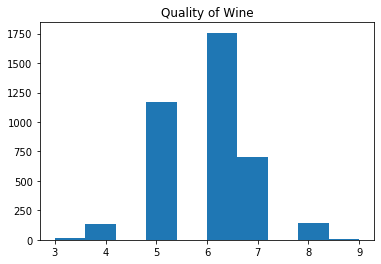

In [3]:

labels=[]
with open("wine_train_set.csv") as csv_file:
    train_data = csv.reader(csv_file, delimiter=',', quotechar='|')
    labels = train_data.__next__()
print(labels)
my_data = np.loadtxt('wine_train_set.csv', delimiter=',',skiprows=1)
print(my_data)
print(my_data.shape[1])
MAX_QUALITY=10
MIN_QUALITY=0
NUM_ATTRIBUTES = len(labels)-1
plt.title("Quality of Wine")
print(my_data[:,-1])
plt.hist(my_data[:,-1])
plt.show()

In [4]:
Y_Number=[]
for i in range(0,11):
    Y_Number.append(0)

In [5]:
for row in my_data:
    quality = row[11]
    Y_Number[(int(quality))]+=1
print(Y_Number)

[0, 0, 0, 16, 130, 1166, 1758, 704, 140, 4, 0]


In [6]:
"""Takes array type and returns variance"""
def calculate_variance(data):
    mean = calculate_mean(data)
    sum = 0.0
    for i in data:
        sum+=(float(i)-float(mean))**2.0
    return sum/float(len(data))
"""Takes array type and returns mean"""
def calculate_mean(data):
    sum = 0.0
    for i in data:
        sum+=float(i)
    return sum/float(len(data))

# Calculating Y Priors

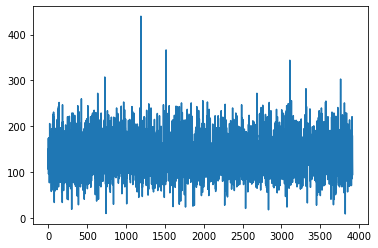

[150. 106. 174. ... 131. 114.  95.]
variance fixed acidity	0.7281495376048622
variance volatile acidity	0.009939864009020012
variance citric acid	0.014644360774123536
variance residual sugar	26.041181904514787
variance chlorides	0.0004568517925278385
variance free sulfur dioxide	292.9602829970729
variance total sulfur dioxide	1801.6978366622886
variance density	9.046107783654085e-06
variance pH	0.02335569577695505
variance sulphates	0.012964421013627847


mean fixed acidity	6.8603241449719246
mean volatile acidity	0.277491066870853
mean citric acid	0.33410413476263084
mean residual sugar	6.423175089331289
mean chlorides	0.04573813169984722
mean free sulfur dioxide	35.4552067381317
mean total sulfur dioxide	138.3843797856049
mean density	0.9940532478305207
mean pH	3.1888386932108124
mean sulphates	0.48909647779479687


In [7]:
#printing variances
plt.plot(my_data[:,6])
plt.show()
print(my_data[:,6])
for i in range(0,10):
    print("variance "+labels[i]+"\t"+str(calculate_variance(my_data[:,i])))
print("\n")
#printing variances
for i in range(0,10):
    print("mean "+labels[i]+"\t"+str(calculate_mean(my_data[:,i])))

In [8]:
def calculate_y_priors(data):
    Y_Prior=[]
    num_samples = data.shape[0]
    for i in range(0,MAX_QUALITY):
        Y_Prior.append(0)
    print("## B: ")
    for i in range(0,MAX_QUALITY):
        Y_Prior[i]=Y_Number[i]/num_samples
    return Y_Prior
y_prior = calculate_y_priors(my_data)
for i in range(0,len(y_prior)):
    print("Y prior "+str(labels[i])+": "+ str(y_prior[i]))


## B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426


# Filter data to make calculating mean+standard deviation easy

In [9]:
# round data format
# filtered_data[Quality][xi][entry]
def filter_data_by_quality(data):
    out_list = []
    for i in range(MIN_QUALITY,MAX_QUALITY+1):
        out_list.append(np.array([]))
    print(data)
    #for i in range(MIN_QUALITY,MAX_QUALITY+1):
    #    out_list.append(np.array([]))
    
    for quality in range(MIN_QUALITY,MAX_QUALITY+1):
        for row in data:
            #print(row)       
            if(row[-1]==quality):
                try:
                    #print(row[:-1])
                    out_list[quality] = np.vstack((out_list[quality],row[:-1]))
                except:
                    out_list[quality] = row[:-1]
                #out_list[quality].append(row[:-1])
                
    return out_list
#print(filter_data_by_quality(my_data))

# Calculating posteriors

In [10]:

"""Runs fn on result of filtered data"""
def run_on_data(data,fn):
    out = []
    for quality in data:
        to_append = np.array([])
        #transposing data to get column
        for col in quality.T:
            #print("")
            #print(col)
            to_append=np.hstack((to_append,fn(col)))
        out.append(to_append)
    return out

In [11]:
#filtered_data = filter_data_by_quality(my_data)
#variance = run_on_data(filtered_data,calculate_variance)
#mean = run_on_data(filtered_data,calculate_mean)
#print("VARIANCE")
#print(variance)
#print("MEAN")
#print(mean)

In [12]:
# calculating probabilities
#print(mean)
#print(prob)
#gen
#prob=[]
def get_prob_given_quality(variance,mean,xi,quality,number):
    assert(type(xi)==int)
    assert(type(quality)==int)
    return (1.0/(math.sqrt(2.0*math.pi*variance[quality][xi])))*\
        math.exp(-0.5*(((number-mean[quality][xi])/
            (math.sqrt(variance[quality][xi])))**2.0))

# 2d getting probabilities for quality=4

In [13]:
#for i in range(0,NUM_ATTRIBUTES):
#    test_number =1.0
#    prob = get_prob_given_quality(variance,mean,i,4,test_number)
#    print("Probility of "+labels[i]+" = "+str(prob))
    

In [14]:
# 2e Evaluate Model
def eval_model(data_in,labels):
    filtered_data = filter_data_by_quality(data_in)
    variance_given_k = run_on_data(filtered_data,calculate_variance)
    mean_given_k = run_on_data(filtered_data,calculate_mean)
    variance = []
    mean = []
    probs = []
    for col in data_in.T[:-1]:
        variance.append(calculate_variance(col))
        mean.append(calculate_mean(col))
    
    #print(data_in)
    #print(variance)
    correct = 0
    total = 0
    y_priors = calculate_y_priors(data_in)
    print("2B: ")
    i=0
    for y in y_priors:
        print("Y prior "+str(labels[i])+": "+ str(y_prior[i]))
        i+=1
    num_prints=0
    num_prints_b=0
    printed_2c=False
    printed_2d=False
    for row in data_in:
        p_x_g = []
        p_x=[]
        for x in range(0,row.shape[0]-1):
            p_x_g.append(get_prob_given_quality(
                variance_given_k,mean_given_k,
                x,int(row[-1]),row[x]))
            p_x.append(
                1/(math.sqrt(2.0*math.pi*variance[x]))*\
        math.exp(-0.5*((row[x]-mean[x])/
            (math.sqrt(variance[x])))**2))
        #evaluating model
        top = 1.0
        i=0
        if(printed_2c==False):
            print("2C: ")
            printed_2c=True
        for prob in p_x_g:
            if(num_prints<NUM_ATTRIBUTES):
                print("Probability of "+labels[i]+" given K: "+str(prob))
            #if(prob>1.0):
            #    print("prob_x_g to big")
            #    print(prob)
            top*=prob
            i+=1
            num_prints+=1
        bottom =1.0
        i=0
        if(printed_2d==False):
            print("2D: ")
            printed_2d=True
        for prob in p_x:
            if(num_prints_b<NUM_ATTRIBUTES):
                print("Probability of "+labels[i]+": "+str(prob))
            #if(prob>1.0):
            #    print("prob to big")
            #    print(prob)
            i+=1
            num_prints_b+=1
            bottom*=prob
        probs.append((top*y_priors[int(row[-1])])/bottom)
    #print(probs)
    print("2E: evaluation of model")
    print("max probability: "+str(max(probs)))
    print("min probability: "+str(min(probs)))
    print("variance of probability: "+str(calculate_variance(probs)))
eval_model(my_data,labels)
    

[[ 5.6   0.21  0.24 ...  0.31 11.5   7.  ]
 [ 6.2   0.3   0.31 ...  0.39 12.9   7.  ]
 [ 6.4   0.27  0.32 ...  0.48  9.4   5.  ]
 ...
 [ 8.9   0.32  0.49 ...  0.34  9.4   5.  ]
 [ 6.4   0.25  0.32 ...  0.58 10.8   7.  ]
 [ 7.7   0.38  0.23 ...  0.41 13.6   6.  ]]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.16154434415383506
Probability of volatile acidity given K: 3.7106762817574603
Probability of citric acid given K: 2.815433445672659
Probability of residual sugar given K: 0.09056251589193959
Probability of chlorides given K: 21.281203019060335
Probability of free sulfur dioxide given K: 0.02990411518862

# 2F Removing Citric Acid

In [15]:
edited_data = np.hstack((my_data[:,0:1],my_data[:,2:]))
edited_labels = labels.copy()
edited_labels.pop(2)

'citric acid'

In [16]:
eval_model(edited_data,edited_labels)

[[ 5.6   0.24  4.4  ...  0.31 11.5   7.  ]
 [ 6.2   0.31  1.6  ...  0.39 12.9   7.  ]
 [ 6.4   0.32  4.5  ...  0.48  9.4   5.  ]
 ...
 [ 8.9   0.49  1.6  ...  0.34  9.4   5.  ]
 [ 6.4   0.32  0.9  ...  0.58 10.8   7.  ]
 [ 7.7   0.23 10.8  ...  0.41 13.6   6.  ]]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior residual sugar: 0.0
Y prior chlorides: 0.00408371618172537
Y prior free sulfur dioxide: 0.033180193976518634
Y prior total sulfur dioxide: 0.29760081674323635
Y prior density: 0.44869831546707506
Y prior pH: 0.17968351199591628
Y prior sulphates: 0.03573251659009699
Y prior alcohol: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.16154434415383506
Probability of volatile acidity given K: 2.815433445672659
Probability of residual sugar given K: 0.09056251589193959
Probability of chlorides given K: 21.281203019060335
Probability of free sulfur dioxide given K: 0.029904115188620257
Probability of total sulfur dioxide given K: 0.0091489

In [17]:
# Evaluating on Test Data

In [18]:
train_labels = []
with open("wine_train_set.csv") as csv_file:
    train_data = csv.reader(csv_file, delimiter=',', quotechar='|')
    train_labels = train_data.__next__()
train_data = np.loadtxt('wine_train_set.csv', delimiter=',',skiprows=1)
eval_model(train_data,train_labels)

[[ 5.6   0.21  0.24 ...  0.31 11.5   7.  ]
 [ 6.2   0.3   0.31 ...  0.39 12.9   7.  ]
 [ 6.4   0.27  0.32 ...  0.48  9.4   5.  ]
 ...
 [ 8.9   0.32  0.49 ...  0.34  9.4   5.  ]
 [ 6.4   0.25  0.32 ...  0.58 10.8   7.  ]
 [ 7.7   0.38  0.23 ...  0.41 13.6   6.  ]]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.16154434415383506
Probability of volatile acidity given K: 3.7106762817574603
Probability of citric acid given K: 2.815433445672659
Probability of residual sugar given K: 0.09056251589193959
Probability of chlorides given K: 21.281203019060335
Probability of free sulfur dioxide given K: 0.02990411518862

Currently the results show a very high maximum probability. This is likely caused by a bug in the code. 

# 2H: Selecting first 1000 and 100 Elements from the training set and viewing results

In [19]:
thousand_data = my_data[0:1000]
eval_model(thousand_data,labels)
hundred_data = my_data[0:100]
eval_model(hundred_data,labels)

[[ 5.6   0.21  0.24 ...  0.31 11.5   7.  ]
 [ 6.2   0.3   0.31 ...  0.39 12.9   7.  ]
 [ 6.4   0.27  0.32 ...  0.48  9.4   5.  ]
 ...
 [ 5.1   0.33  0.22 ...  0.38 12.5   7.  ]
 [ 6.6   0.15  0.34 ...  0.42  9.6   5.  ]
 [ 6.5   0.23  0.36 ...  0.41  8.8   5.  ]]
## B: 
2B: 
Y prior fixed acidity: 0.0
Y prior volatile acidity: 0.0
Y prior citric acid: 0.0
Y prior residual sugar: 0.00408371618172537
Y prior chlorides: 0.033180193976518634
Y prior free sulfur dioxide: 0.29760081674323635
Y prior total sulfur dioxide: 0.44869831546707506
Y prior density: 0.17968351199591628
Y prior pH: 0.03573251659009699
Y prior sulphates: 0.0010209290454313426
2C: 
Probability of fixed acidity given K: 0.1855287964043144
Probability of volatile acidity given K: 3.779722617176288
Probability of citric acid given K: 2.779581663716998
Probability of residual sugar given K: 0.09239576075940568
Probability of chlorides given K: 21.651129001538827
Probability of free sulfur dioxide given K: 0.0287731239429731